# <center>Feedforward and Backpropagation</center>
## <center>Inclass Project 2 - MA4144</center>

This project contains 10 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to build a Multi Layer perceptron (MLP) model from scratch for binary classification. That is given an input $x$ output the associated class label $0$ or $1$.

In particular, we will classify images of handwritten digits ($0, 1, 2, \cdots, 9$). For example, given a set of handwritten digit images that only contain two digits (Eg: $1$ and $5$) the model will classify the images based on the written digit.

For this we will use the MNIST dataset (collection of $28 \times 28$ images of handwritten digits) - you can find additional information about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width="250">

***


Use the below cell to use any include any imports

In [4]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

2024-09-17 21:43:33.148940: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-17 21:43:33.994446: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Section 1: Preparing the data

In [5]:
#Load the dataset as training and testing, then print out the shapes of the data matrices

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


**Q1.** In the following cell write code to display $5$ random images in train_X and it's corresponding label in train_y. Each time it is run, you should get a different set of images. The imshow function in the matplotlib library could be useful. Display them as [grayscale images](https://en.wikipedia.org/wiki/Grayscale).

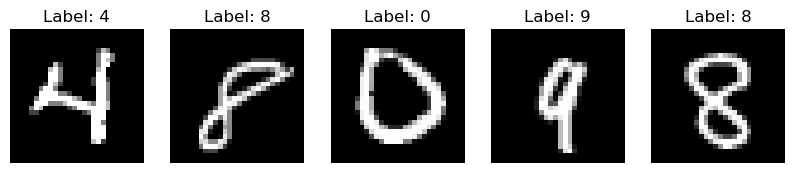

In [6]:
#TODO Code to display 5 random handritten images from train_X and corresponting labels from train_y

def display_random_5_images(images, labels):
    plt.figure(figsize=(10, 4))

    # Select random indices for images
    random_indices = np.random.randint(0, images.shape[0], 5)

    for i, index in enumerate(random_indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[index], cmap='gray')  # Display as grayscale
        plt.title(f"Label: {labels[index]}")
        plt.axis('off')  

    plt.show()


display_random_5_images(train_X, train_y)



**Q2.** Given two digits $d_1$ and $d_2$, both between $0$ and $9$, in the following cell fill in the function body to extract all the samples corresponding to $d_1$ or $d_2$ only, from the dataset $X$ and labels $y$. You can use the labels $y$ to filter the dataset. Assume that the $i$th image $X[i]$ in $X$ is given by $y[i]$. The function should return the extracted samples $X_{extracted}$ and corresponding labels $y_{extracted}$. Avoid using for loops as much as possible, infact you do not need any for loops. numpy.where function should be useful.

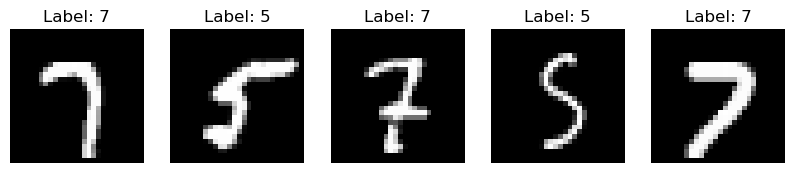

In [7]:
def extract_digits(X, y, d1, d2):

    assert d1 in range(0, 10), "d1 should be a number between 0 and 9 inclusive"
    assert d2 in range(0, 10), "d2 should be a number between 0 and 9 inclusive"
    
    #TODO
    # Use np.where to find the indices where labels are either d1 or d2
    indices = np.where((y == d1) | (y == d2))
    
    # Extract the corresponding images and labels
    X_extracted = X[indices]
    y_extracted = y[indices]
    

    return (X_extracted, y_extracted)

#Testing the extraction
X1,Y1 = extract_digits(train_X,train_y,7,5)
display_random_5_images(X1, Y1)


**Q3.** Both the training dataset train_X and test_y is a 3 dimensional numpy array, each image occupies 2 dimensions. For convenience of processing data we usually comvert each $28 \times 28$ image matrix to a vector with $784$ entries. We call this process **vectorize images**.

Once we vectorize the images, the vectorized data set would be structured as follows: $i$th row will correspond to a single image and $j$th column will correspond to the $j$th pixel value of each vectorized image. However going along with the convention we discussed in the lecture, the input to the MLP model will require that the columns correspond to individual images. Hence we also require a transpose of the vectorized results.

The pixel values in the images will range from $0$ to $255$. Normalize the pixel values between $0$ and $1$, by dividing each pixel value of each image by the maximum pixel value of that image. Simply divide each column of the resulting matrix above by the max of each column. 

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdN_8m9FEqjqAB07obTmB6gNc7S2rSoGBYaA&s"></center>

Given a dataset $X$ of size $N \times 28 \times 28$, in the following cell fill in the function to do the following in order;
1. Vectorize the dataset resulting in dataset of size $N \times 784$.
2. Transpose the vectorized result.
3. Normalize the pixel values of each image.
4. Finally return the vectorized, transposed and normalized dataset $X_{transformed}$.

Again, avoid for loops, functions such as numpy.reshape, numpy.max etc should be useful.

In [9]:
def vectorize_images(X):
    N = X.shape[0]
    X_vectorized = np.reshape(X, (N, 784))
    
    vectorized_transposed = np.transpose(X_vectorized)
    max_in_coloum = np.max(vectorized_transposed , axis=0)

    X_transformed = vectorized_transposed / max_in_coloum
    


    return(X_transformed)
    
# np.set_printoptions(threshold=np.inf)
# print(vectorize_images(train_X)[500])

**Q4.** In the following cell write code to;

1. Extract images of the digits $d_1 = 1$ and $d_2 = 5$ with their corresponding labels for both the training set (train_X, train_y) and testing set (test_X, test_y) separately.
2. Then vectorize the data, tranpose the result and normlize the images.
3. Store the results after the final transformations in numpy arrays train_X_1_5, train_y_1_5, test_X_1_5, test_y_1_5
4. Our MLP will output only class labels $0$ and $1$ (not $1$ and $5$), so create numpy arrays to store the class labels as follows:
   $d_1 = 1$ -> class label = 0 and $d_2 = 5$ -> class label = 1. Store them in the arrays named train_class_1_5, test_class_1_5.

Use the above functions you implemented above to complete this task. In addtion, numpy.where could be useful. Avoid for loops as much as possible.

In [50]:
#Extract images of digits d=1 and d=5
extract_X_train,train_y_1_5 = extract_digits(train_X, train_y,1,5)
extract_X_test,test_y_1_5  = extract_digits(train_X, train_y,1,5)

#Vectorizing the data
train_X_1_5 = vectorize_images(extract_X_train)
test_X_1_5  = vectorize_images(extract_X_test)

#storing the class label as 0,1
train_class_1_5 = np.where(train_y_1_5 == 1 , 0 , 1)
test_class_1_5 = np.where(test_y_1_5 == 1 , 0 , 1)

# print(np.shape(train_X_1_5))

train_X_1_5_first_1000 = train_X_1_5[:, :1000]
train_y_1_5_first_1000 = train_y_1_5[:1000]
# print(np.shape(train_X_1_5_first_1000))
# print(np.shape(train_y_1_5_first_1000))

## Section 2: Implementing MLP from scratch with training algorithms.

Now we will implement code to build a customizable MLP model. The hidden layers will have the **Relu activation function** and the final output layer will have **Sigmoid activation function**.

**Q5.** Recall the following about the activation functions:
1. Sigmoid activation: $y = \sigma(z) = \frac{1}{1 + e^{-z}}$.
2. Derivative of Sigmoid: $y' = \sigma'(z) = \sigma(z) (1 - \sigma(z)) = y(1-y)$
3. ReLu activation: $y = ReLu(z) = max(0, z)$
4. Derivative of ReLu: $y' = ReLu'(z) = \begin{cases} 0 \; \textrm{if } z < 0 \\ 1 \; \textrm{otherwise} \end{cases} = \begin{cases} 0 \; \textrm{if } y = 0 \\ 1 \; \textrm{otherwise} \end{cases}$

In the following cell implement the functions to compute activation functions Sigmoid and ReLu given $z$ and derivatives of the Sigmoid and ReLu activation functions given $y$. Note that the input to the derivative functions is $y$ not $z$.

In practice the input will not be just single numbers, but matrices. So functions or derivatives should be applied elementwise on matrices. Again avoid for loops, use the power of numpy arrays - search for numpy's capability of doing elementwise computations.

Important: When implementing the sigmoid function make sure you handle overflows due to $e^{-z}$ being too large. To avoid you can choose to set the sigmoid value to 'the certain appropriate value' if $z$ is less than a certain good enough negative threshold. If you do not handle overflows, the entire result will be useless fince the MLP will just output Nan (not a number) for evry input at the end.

In [11]:
def sigmoid(Z):
    

    #TODO
    Z_clipped = np.clip(Z, -500, 500)  # Clip Z between -25 and 25
    
    sigma = 1 / (1 + np.exp(-Z_clipped))
    
    return(sigma)

def deriv_sigmoid(Y):
    
    # Clip Y values to avoid extremely small or large values
    Y = np.clip(Y, 1e-8, 1 - 1e-8)
    sigma_prime = Y * (1 - Y)
    
    return(sigma_prime)

def ReLu(Z):
    relu = np.maximum(0,Z)
    
    return(relu)

def deriv_ReLu(Y):

    relu_prime = np.where(Y<0, 0 , 1)
    
    return(relu_prime)


**Q6.** The following piece of code defines a simple MLP architecture as a Python class and subsequent initialization of a MLP model. <font color='blue'>Certain lines of code contains commented line numbers. Write a short sentence for each such line explaining its purpose. Feel free to refer to the lecture notes or any resources to answers these question. In addition, explain what the Y, Z, W variables refer to and their purpose</font>

In [12]:
class NNet:
    def __init__(self, input_size = 784, output_size = 1, batch_size = 1000, hidden_layers = [500, 250, 50]):
        self.Y = []
        self.Z = []
        self.W = []
        self.input_size = input_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers

        layers = [input_size] + hidden_layers + [output_size]
        L = len(hidden_layers) + 1
    
        for i in range(1, L + 1):
            self.Y.append(np.zeros((layers[i], batch_size)))                        #line1
            self.Z.append(np.zeros((layers[i], batch_size)))                        #Line2
            self.W.append(2*(np.random.rand(layers[i], layers[i-1] + 1) - 0.5))     #Line3

**Answers** (to write answers edit this cell)

(i) What does the Y, Z, W variables refer to and their purpose?

<font color='blue'>**Y = Activations**  </font>

<font color='blue'>After applying the activation function , Y represents the output of the layer. The activations are used as the inputs to the next layer in the network. </font>

<font color='blue'>**Z = Pre-Activations** </font>

<font color='blue'>This use to stores the pre-activations for each neuron, which are the weighted sums of inputs and biases before applying the activation function. </font>

<font color='blue'> **W = Weights** </font>

<font color='blue'> These are use to represent the strength of the connections between neurons in consecutive layers. </font>

(ii) Line1: Explanation - 

<font color='blue'>Initializes a zero matrix for the activations Y for each layer in the network. </font>

(iii) Line2: Explanation -

<font color='blue'> Initializes a zero matrix for the pre-activations Z for each layer in the network.  </font>

(iv) Line3: Explanation -

<font color='blue'>Initializes the weight matrix W for each layer.The weights are randomly initialized to small values in the range [-1, 1) using np.random.rand() to ensure proper learning during training. </font>

**Q7.** Now we will implement the feedforward algorithm. Recall from the lectures that for each layer $l$ there is input $Y^{(l-1)}$ from the previous layer if $l > 1$ and input data $X$ if $l = 1$. Then we compute $Z^{(l)}$ using the weight matrix $W^{(l)}$ as follows from matrix multiplication:

$Z^{(l)} = W^{(l)} Y^{(l-1)}$

Make sure that during multiplication you add an additional row of one's to $Y^{(l-1)}$ to accommodate the bias term. However, the rows of ones should not permanently remain on $Y^{(l-1)}$. <font color='blue'>Explain what the bias term is and how adding a row of one's help with the bias terms.</font> During definition above the weight matrices are initialised to afford this extra bias term, so no change to either $Z^{(l)}$ or $W^{(l)}$ is needed.

Next compute $Y^{(l)}$, the output of layer $l$ by activation through sigmoid.

$Y^{(l)} = \sigma(Z^{(l)})$

The implemented feedforward algorithm should take in a NNet model and an input matrix $X$ and output the modified MLP model - the $Y$'s and $Z$'s computed should be stored in the model for the backpropagation algorithm.

As usual avoid for loops as much as possible, use the power of numpy. However, you may use a for loop to iterate through the layers of the model.

In [13]:
X= np.array([[1, 2], [3, 4]])
print(X)
print(np.vstack([X, np.ones((1, X.shape[1]))])) 


[[1 2]
 [3 4]]
[[1. 2.]
 [3. 4.]
 [1. 1.]]


In [14]:
def feedforward(model, X):
    Y_prev = np.vstack([X, np.ones((1, X.shape[1]))])
    L = len(model.hidden_layers) + 1

    for l in range(L):
        Z = np.dot(model.W[l], Y_prev)
        model.Z[l] = Z 
        if l < L - 1: 
            Y = ReLu(Z)
        else:
            Y = sigmoid(Z)
        model.Y[l] = Y
        
        if l < L - 1: 
            Y_prev = np.vstack([Y, np.ones((1, Y.shape[1]))]) 
        else:
            Y_prev = Y  # for output layer no bias needed
             
    return(model)



**Answer** (to write answers edit this cell)

Explain what the bias term is and how adding a row of one's help with the bias terms.

bias term is an additional parameter that is added to the weighted sum of inputs before passing it through the activation function. It allows the model to shift the activation function, enabling it to better fit the data by increasing the flexibility of the model.


Row of ones is treated as part of the input but does not represent any feature. Instead, it ensures that the bias is added when the matrix multiplication occurs between the weights and the inputs.So the bias terms are also inside the weight matrix.


**Q8.** Now we will implement the backpropagation algorithm. The cost function $C$ at the end is given by the square loss.

$C = \frac{1}{2} ||Y^{(L)} - Y||^{2}$, where $Y^{(L)}$ is the final output vector of the feedforward algorithm and $Y$ is the actual label vector associated with the input $X$.

At each layer $l = 1, 2, \cdots, L$ we compute the following (note that the gradients are matrices with the same dimensions as the variable to which we derivating with respect to):

1. Gradient of $C$ with respect to $Z^{(l)}$ as <br> $\frac{\partial C}{\partial Z^{(l)}} = deriv(A^{(l)}(Z^{(l)})) \odot \frac{\partial C}{\partial Y^{(L)}} $, <br> where $A^{(l)}$ is the activation function of the $l$th layer, and we use the derivative of that here. The $\odot$ refers to the elementwise multiplication.

2. Gradient of $C$ with respect to $W^{(l)}$ as <br> $\frac{\partial C}{\partial W^{(l)}} = \frac{\partial C}{\partial Z^{(l)}} (Y^{(l-1)})^{T}$ <br> this is entirely matrix multiplication.

3. Gradient of $C$ with respect to $Y^{(l-1)}$ as <br> $\frac{\partial C}{\partial Y^{(l-1)}} = (W^{(l)})^{T} \frac{\partial C}{\partial Z^{(l)}}$ <br> this is also entirely matrix multiplication.

4. Update weights by: <br> $W^{(l)} \leftarrow W^{(l)} - \eta \frac{\partial C}{\partial W^{(l)}}$, <br> where $\eta > 0$ is the learning rate.

The loss derivative (the gradient of $C$ with respect to $Y^{(L)}$) at the last layer is given by:

$\frac{\partial C}{\partial Y^{(L)}} = Y^{(L)} - Y$

By convention we consider $Y^{(0)} = X$, the input data.

Based on the backpropagation algorithm implement the backpropagation method in the following cell. Remember to temporarily add a row of ones to $Y^{(l-1)}$ when computing $\frac{\partial C}{\partial W^{(l)}}$ as we discussed back in the feedforward algorithm. Make sure you avoid for loops as much as possible.

The function takes in a NNet model, input data $X$ and the corresponding class labels $Y$. learning rate can be set as desired.

In [16]:
def backpropagation(model, X, Y, eta = 0.01):
    
    L = len(model.hidden_layers) 

    dC_dYl_prev = model.Y[L] - Y #lost derivative of last layer

    for l in range(L, -1 , -1):
        if l==L:
            dC_dZl =  deriv_sigmoid(model.Z[l]) * dC_dYl_prev
        else:
            dC_dZl =  deriv_ReLu(model.Z[l]) * dC_dYl_prev
            
        
        
        if (l) == 0:  # input layer
            Y_new = np.vstack([X, np.ones((1, X.shape[1]))])  
        else:
            Y_new = np.vstack([model.Y[l-1], np.ones((1, model.Y[l-1].shape[1]))])
        dC_dWl = np.dot(dC_dZl, np.transpose(Y_new))
        
        
        #dC_dYl_prev = np.dot(np.transpose(model.W[l] , dC_dZl))
        dC_dYl_prev = np.dot(model.W[l][:, :-1].T, dC_dZl) 
        model.W[l] = model.W[l] - (eta* dC_dWl)

                          
    return(model)




**Q9.** Now implement the training algorithm.

The training method takes in training data $X$, actual label $Y$, number of epochs, batch_size, learning rate $\eta > 0$. The training will happen in epochs. For each epoch, permute the data columns of both $X$ and $Y$, then divide both $X$ and $Y$ into mini batches each with the given batch size. Then run the feedforward and backpropagation for each such batch iteratively.

At the end of each iteration, keep trach of the cost $C$ and the $l_2$-norm of change in each weight matrix $W^{(l)}$.

At the end of the last epoch, plot the variation cost $C$ and change in weight matrices. Then return the trained model.



In [17]:
def train_NNet(X, Y, epochs = 20, batch_size = 1000, eta = 0.001 , hidden_layers=[500,250,50]):
    
    n_samples = X.shape[1] 
    cost_C = [] 
    weight_changes = [] 
    model = NNet(batch_size = batch_size , hidden_layers = hidden_layers)
    
    for epoch in range(epochs):
        
        # Shuffling the data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[:, indices]
        Y_shuffled = Y[indices]
        
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[:, i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size] 
            
            # feddforward
            model = feedforward(model, X_batch)
            
            cost = 0.5 * np.linalg.norm(model.Y[-1] - Y_batch) ** 2
            cost_C.append(cost)
            
            # Backpropagation
            model = backpropagation(model, X_batch, Y_batch, eta)
            
            weight_norm = np.linalg.norm([np.linalg.norm(w) for w in model.W])
            weight_changes.append(weight_norm)
        
        print(f'Epoch {epoch+1}/{epochs}, Cost: {cost_C[-1]}')

    #Ploting
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(cost_C, label='Cost')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over time',pad= 20)
    plt.legend()

    
    plt.subplot(1, 2, 2)
    plt.plot(weight_changes, label='Weight Changes')
    plt.xlabel('Iterations')
    plt.ylabel('L2 norm of weight changes')
    plt.title('L2 Norm of Weight Changes over time',pad=20)
    plt.legend()
    
    plt.suptitle(f'For the parameters : Epochs={epoch} , Batch Size={batch_size} , eta={eta} , hidden_layers={hidden_layers}', fontsize=12,y=1.08)
    
    plt.show()


    return(model)

## Section 3: Evaluation using test data

The following function will evaluate then return an accuracy score and the predicted labels for your model. Do not change anything here.

In [18]:
def test_model(test_data, test_labels, model, d1, d2):
    
    L = len(model.hidden_layers) + 1
    
    Y = test_data
    for i in range(L):
        Z = np.matmul(model.W[i], np.append(Y, np.array([np.ones(Y.shape[1])]), axis = 0))
        if i < L - 1:
            Y = ReLu(Z)
        else:
            Y = sigmoid(Z)
    
    Y = Y[0]
    Y = np.where(Y >= 0.5, 1, 0)
    Y_predicted = np.where(Y == 0, d1, d2)

    acc = accuracy_score(test_labels, Y_predicted)

    return(acc, Y_predicted)

    

**Q10.** Use this test_model function to evaluate your model with the $1$ and $5$ digits. An accuracy $>= 99%$ is achievable. Test with different batch sizes, $\eta$ values and hidden layers. Find which of those hyperparameters gives the best test accuracy. <font color='blue'>Document the hyperparameter values that gives the best testing accuracy and that best accuracy. Plot a confusion matrix and comment on your observations with reasons. Also, look into the nature of the plots that result fom the training procedure, see how they vary with the hyperparameters and provide your ideas on the observations. Then do the same with a few other pairs of digits $d_1, d_2$. Especially, try $d_1 = 1, d_2 = 7$. Comment on your observations and explain possible reasons</font>.

Epoch 1/20, Cost: 0.018591177548255157
Epoch 2/20, Cost: 0.1402837644768404
Epoch 3/20, Cost: 0.15463555005037377
Epoch 4/20, Cost: 0.0833165890876632
Epoch 5/20, Cost: 0.037434974168496275
Epoch 6/20, Cost: 0.0760557873615209
Epoch 7/20, Cost: 0.0912336066643789
Epoch 8/20, Cost: 0.010396445961437599
Epoch 9/20, Cost: 0.05075895482462128
Epoch 10/20, Cost: 0.008915736241947024
Epoch 11/20, Cost: 0.1181409873751144
Epoch 12/20, Cost: 0.024986828847171207
Epoch 13/20, Cost: 0.08057974769465923
Epoch 14/20, Cost: 0.10247970484440272
Epoch 15/20, Cost: 0.00038115570805077707
Epoch 16/20, Cost: 0.12203578864052284
Epoch 17/20, Cost: 0.00023053218901131244
Epoch 18/20, Cost: 0.16785161348073965
Epoch 19/20, Cost: 0.026100203670119764
Epoch 20/20, Cost: 0.08178643957854534


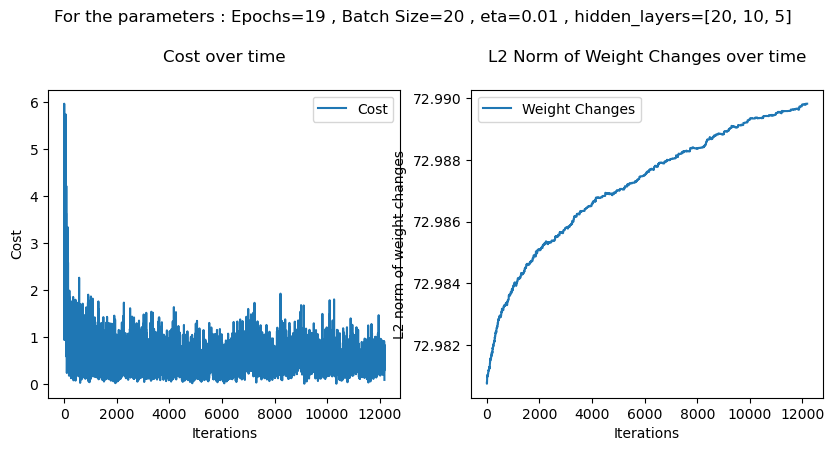

Batch size: 20, Learning rate: 0.01, Hidden Layers: [20, 10, 5], epochs:20 , Accuracy: 0.9902
 
Epoch 1/20, Cost: 0.543254617294342
Epoch 2/20, Cost: 0.1371191270491355
Epoch 3/20, Cost: 0.0628670564100018
Epoch 4/20, Cost: 0.14796071333565322
Epoch 5/20, Cost: 0.10313486927445419
Epoch 6/20, Cost: 0.18041804525027022
Epoch 7/20, Cost: 0.061297360707163295
Epoch 8/20, Cost: 0.2785593844604566
Epoch 9/20, Cost: 0.16469245427818408
Epoch 10/20, Cost: 0.15006629963313262
Epoch 11/20, Cost: 0.053497558963328015
Epoch 12/20, Cost: 0.05284789698796925
Epoch 13/20, Cost: 0.1572397548341638
Epoch 14/20, Cost: 0.01745611282095534
Epoch 15/20, Cost: 0.10257496837256444
Epoch 16/20, Cost: 0.05104384261985484
Epoch 17/20, Cost: 0.10101228254856946
Epoch 18/20, Cost: 0.05481227955586276
Epoch 19/20, Cost: 0.42069717635637355
Epoch 20/20, Cost: 0.0498696898578089


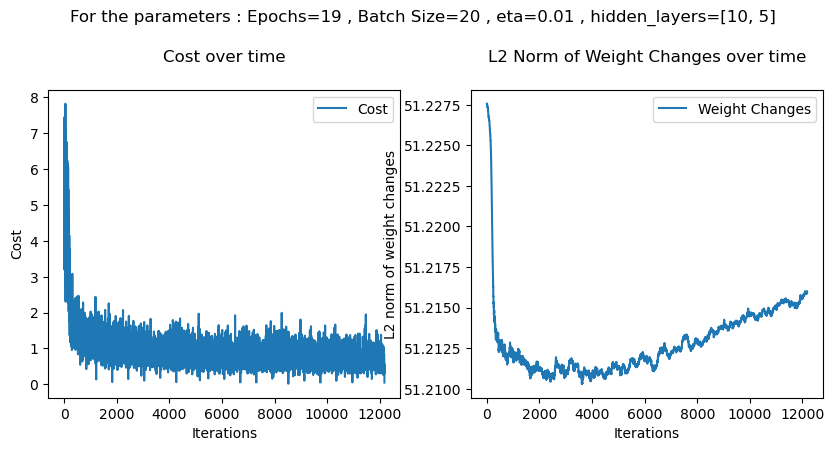

Batch size: 20, Learning rate: 0.01, Hidden Layers: [10, 5], epochs:20 , Accuracy: 0.9836
 
Epoch 1/20, Cost: 0.49999999999923705
Epoch 2/20, Cost: 0.500000000000431
Epoch 3/20, Cost: 0.5000000000025138
Epoch 4/20, Cost: 0.9999999997976856
Epoch 5/20, Cost: 0.49999999979513865
Epoch 6/20, Cost: 1.4999999999898819
Epoch 7/20, Cost: 0.9999989775569564
Epoch 8/20, Cost: 7.575624816540064e-21
Epoch 9/20, Cost: 0.9999999999608203
Epoch 10/20, Cost: 0.9999997544111777
Epoch 11/20, Cost: 1.0000000127165192
Epoch 12/20, Cost: 0.50000000004779
Epoch 13/20, Cost: 1.4999999998408058
Epoch 14/20, Cost: 0.5
Epoch 15/20, Cost: 0.49999999999997247
Epoch 16/20, Cost: 0.9999999857491534
Epoch 17/20, Cost: 0.9999999999998953
Epoch 18/20, Cost: 0.9999997504248802
Epoch 19/20, Cost: 6.073161717109919e-24
Epoch 20/20, Cost: 5.069596872445417e-12


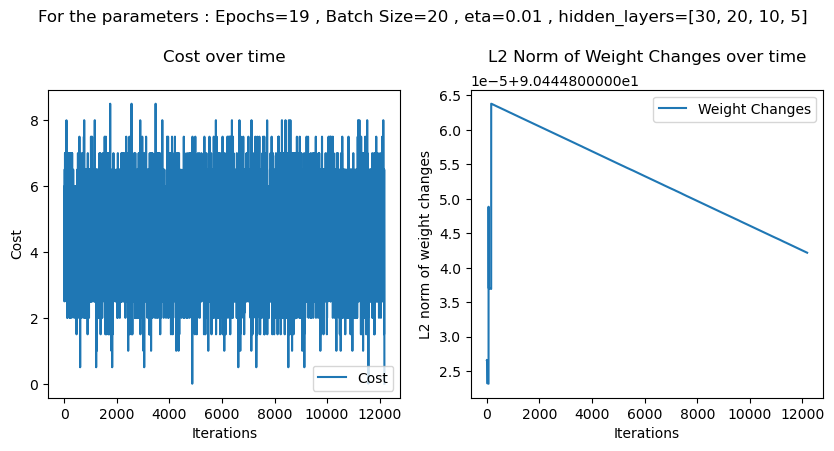

Batch size: 20, Learning rate: 0.01, Hidden Layers: [30, 20, 10, 5], epochs:20 , Accuracy: 0.5543
 
Epoch 1/20, Cost: 0.9999999999824992
Epoch 2/20, Cost: 1.000000000006091
Epoch 3/20, Cost: 0.9999996805019951
Epoch 4/20, Cost: 0.4999999999998983
Epoch 5/20, Cost: 0.9999999649700102
Epoch 6/20, Cost: 0.49995765064279163
Epoch 7/20, Cost: 0.9999970563912801
Epoch 8/20, Cost: 0.4999999943663367
Epoch 9/20, Cost: 3.750201913643531e-17
Epoch 10/20, Cost: 0.9999999782380747
Epoch 11/20, Cost: 0.9999999999148628
Epoch 12/20, Cost: 1.4999998829885377
Epoch 13/20, Cost: 0.9999999332616917
Epoch 14/20, Cost: 1.4999999999502742
Epoch 15/20, Cost: 0.999999921035433
Epoch 16/20, Cost: 0.0
Epoch 17/20, Cost: 0.999999998967448
Epoch 18/20, Cost: 1.4999911703661777
Epoch 19/20, Cost: 1.4999806547646186
Epoch 20/20, Cost: 2.915045955657814e-19


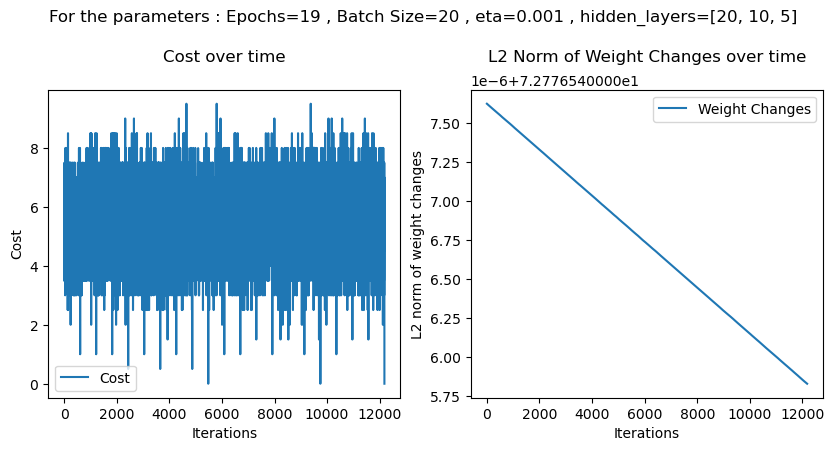

Batch size: 20, Learning rate: 0.001, Hidden Layers: [20, 10, 5], epochs:20 , Accuracy: 0.4457
 
Epoch 1/20, Cost: 0.1473275251733793
Epoch 2/20, Cost: 0.009511111650957665
Epoch 3/20, Cost: 0.03832878907985216
Epoch 4/20, Cost: 0.009677050891652357
Epoch 5/20, Cost: 6.284886449836241e-06
Epoch 6/20, Cost: 0.0801574062469602
Epoch 7/20, Cost: 0.04607697336469554
Epoch 8/20, Cost: 0.39472343309775215
Epoch 9/20, Cost: 0.0007303827228959885
Epoch 10/20, Cost: 0.4723205851550211
Epoch 11/20, Cost: 0.007478654125925106
Epoch 12/20, Cost: 0.4899561129177009
Epoch 13/20, Cost: 0.012946851249606508
Epoch 14/20, Cost: 0.043497023603911784
Epoch 15/20, Cost: 2.251274642742604e-05
Epoch 16/20, Cost: 6.82670157113423e-08
Epoch 17/20, Cost: 0.0004171454467342225
Epoch 18/20, Cost: 0.00043023444978178396
Epoch 19/20, Cost: 0.00024158025310925025
Epoch 20/20, Cost: 0.0011285588308017633


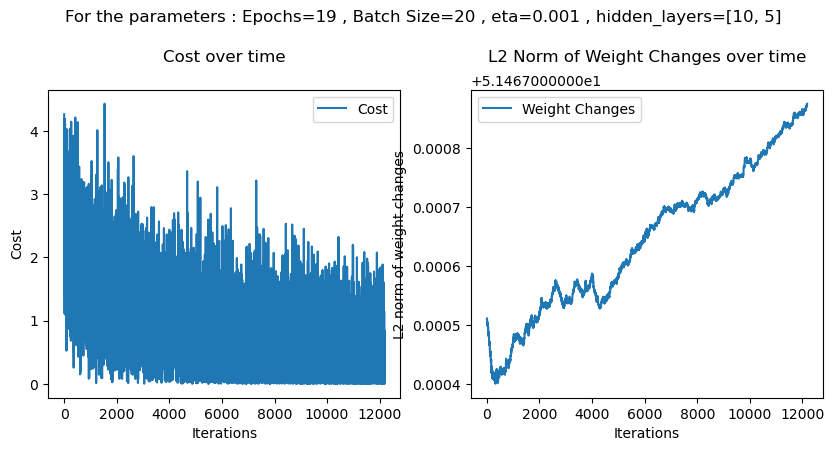

Batch size: 20, Learning rate: 0.001, Hidden Layers: [10, 5], epochs:20 , Accuracy: 0.9362
 
Epoch 1/20, Cost: 0.4034583233554051
Epoch 2/20, Cost: 0.5017215683216958
Epoch 3/20, Cost: 0.060535909533077185
Epoch 4/20, Cost: 1.0840498977392719e-08
Epoch 5/20, Cost: 1.3241805051691022e-06
Epoch 6/20, Cost: 8.221641408745978e-15
Epoch 7/20, Cost: 8.242931069261115e-07
Epoch 8/20, Cost: 1.2554893148541385e-16
Epoch 9/20, Cost: 1.5345776022369398e-06
Epoch 10/20, Cost: 4.377067345789547e-25
Epoch 11/20, Cost: 0.08432779861890616
Epoch 12/20, Cost: 2.736952443075823e-28
Epoch 13/20, Cost: 6.088550447862605e-07
Epoch 14/20, Cost: 4.914218392250906e-07
Epoch 15/20, Cost: 0.08397809295925235
Epoch 16/20, Cost: 5.612949876719036e-09
Epoch 17/20, Cost: 1.0276806192370147e-21
Epoch 18/20, Cost: 1.1023527345951502e-09
Epoch 19/20, Cost: 9.321358155576678e-16
Epoch 20/20, Cost: 6.9263554314100715e-15


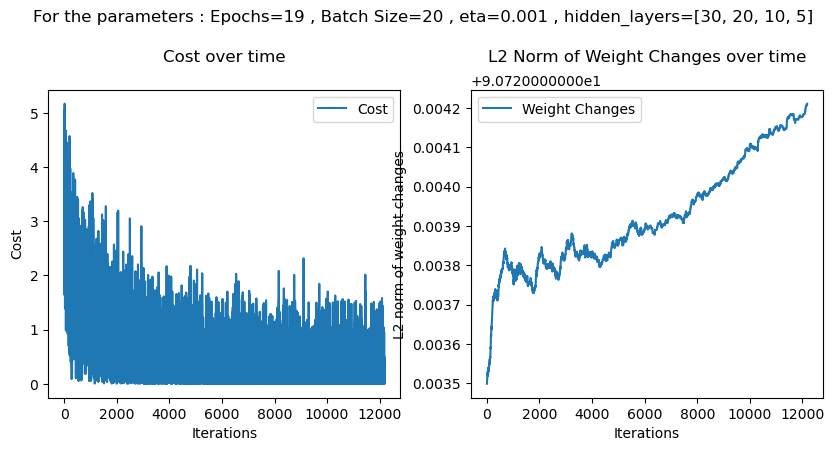

Batch size: 20, Learning rate: 0.001, Hidden Layers: [30, 20, 10, 5], epochs:20 , Accuracy: 0.9725
 
Epoch 1/20, Cost: 0.23773472241037227
Epoch 2/20, Cost: 0.2075107087296608
Epoch 3/20, Cost: 0.17991029554323323
Epoch 4/20, Cost: 0.1945494768812098
Epoch 5/20, Cost: 0.2810339945367332
Epoch 6/20, Cost: 0.05267611626211258
Epoch 7/20, Cost: 0.09347181386090438
Epoch 8/20, Cost: 0.19439842246507608
Epoch 9/20, Cost: 0.02776209932459613
Epoch 10/20, Cost: 0.1694506246849387
Epoch 11/20, Cost: 0.17030250779988074
Epoch 12/20, Cost: 0.1753591179232798
Epoch 13/20, Cost: 0.11887777418377646
Epoch 14/20, Cost: 0.033916754678497606
Epoch 15/20, Cost: 0.242465345941263
Epoch 16/20, Cost: 0.023699055282927754
Epoch 17/20, Cost: 0.08045297089237967
Epoch 18/20, Cost: 0.18822778777441523
Epoch 19/20, Cost: 2.115612817923408e-05
Epoch 20/20, Cost: 0.06040664116807082


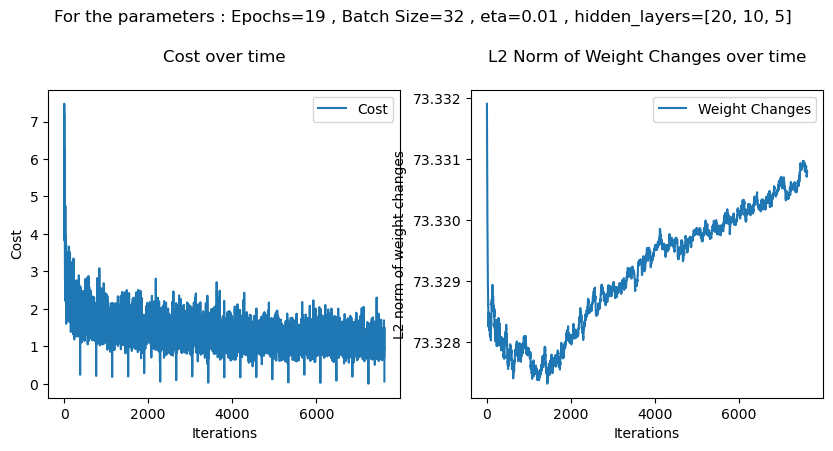

Batch size: 32, Learning rate: 0.01, Hidden Layers: [20, 10, 5], epochs:20 , Accuracy: 0.9896
 
Epoch 1/20, Cost: 1.4948286116894416
Epoch 2/20, Cost: 0.999929617143018
Epoch 3/20, Cost: 0.9971116664554743
Epoch 4/20, Cost: 0.995735985982005
Epoch 5/20, Cost: 0.49690065911872816
Epoch 6/20, Cost: 0.9241382819185744
Epoch 7/20, Cost: 0.9894440856594241
Epoch 8/20, Cost: 0.018488332097854585
Epoch 9/20, Cost: 0.9997313978364414
Epoch 10/20, Cost: 1.2626870793885012
Epoch 11/20, Cost: 0.49999629312305727
Epoch 12/20, Cost: 0.49550030408930845
Epoch 13/20, Cost: 1.4619713814862476
Epoch 14/20, Cost: 0.5007198914281755
Epoch 15/20, Cost: 0.4980653395696251
Epoch 16/20, Cost: 0.5021874221611571
Epoch 17/20, Cost: 0.4999500720827851
Epoch 18/20, Cost: 0.4995803299773284
Epoch 19/20, Cost: 0.48947735061550635
Epoch 20/20, Cost: 0.49999825757063165


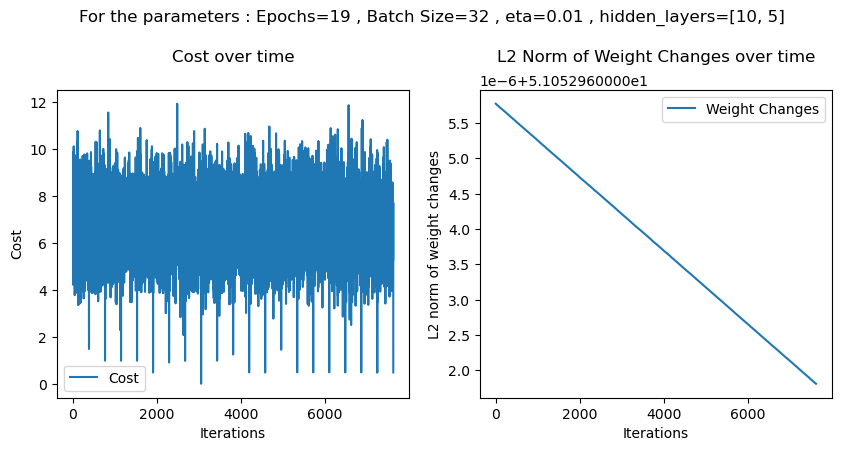

Batch size: 32, Learning rate: 0.01, Hidden Layers: [10, 5], epochs:20 , Accuracy: 0.5543
 
Epoch 1/20, Cost: 1.0000000000000002
Epoch 2/20, Cost: 0.08038908613739691
Epoch 3/20, Cost: 0.4999984509316705
Epoch 4/20, Cost: 2.247060300785238e-41
Epoch 5/20, Cost: 1.1310579002645063e-14
Epoch 6/20, Cost: 1.8768164099431147e-16
Epoch 7/20, Cost: 3.4212652810101353e-20
Epoch 8/20, Cost: 3.3592207573354836e-16
Epoch 9/20, Cost: 1.0356800897030628e-17
Epoch 10/20, Cost: 2.017637370402589e-40
Epoch 11/20, Cost: 1.847094293014991e-17
Epoch 12/20, Cost: 6.793251024923348e-40
Epoch 13/20, Cost: 3.503879091305318e-44
Epoch 14/20, Cost: 8.89933708702454e-30
Epoch 15/20, Cost: 4.972682347064e-21
Epoch 16/20, Cost: 2.398740000319151e-65
Epoch 17/20, Cost: 0.0
Epoch 18/20, Cost: 1.7990704847978413e-51
Epoch 19/20, Cost: 3.066917634154176e-15
Epoch 20/20, Cost: 3.0231425741308015e-61


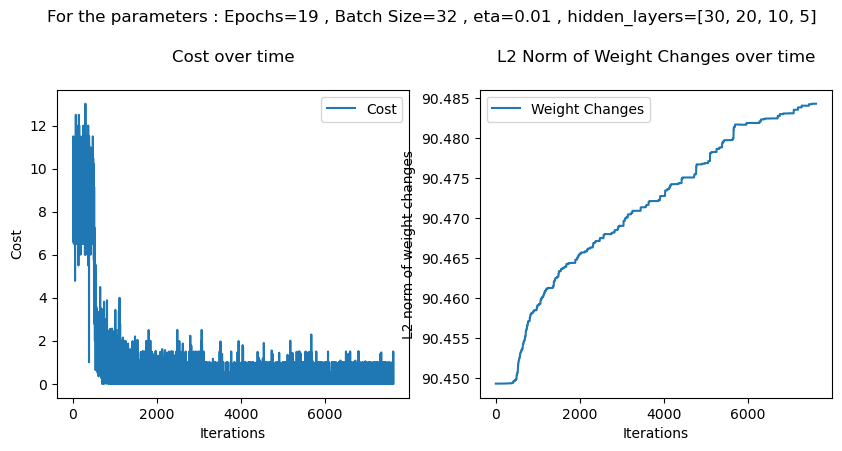

Batch size: 32, Learning rate: 0.01, Hidden Layers: [30, 20, 10, 5], epochs:20 , Accuracy: 0.9897
 
Epoch 1/20, Cost: 0.0890447038310362
Epoch 2/20, Cost: 0.000658482663432327
Epoch 3/20, Cost: 0.08660233531139087
Epoch 4/20, Cost: 0.1631786021257248
Epoch 5/20, Cost: 0.4767620461612143
Epoch 6/20, Cost: 0.1352412247920023
Epoch 7/20, Cost: 0.040176062357847896
Epoch 8/20, Cost: 0.03351158629318008
Epoch 9/20, Cost: 0.4529549745879041
Epoch 10/20, Cost: 0.0002300764482988196
Epoch 11/20, Cost: 0.10498874253248906
Epoch 12/20, Cost: 3.9978421271599996e-06
Epoch 13/20, Cost: 0.038809583175524166
Epoch 14/20, Cost: 0.004709848223480729
Epoch 15/20, Cost: 0.013852134158728975
Epoch 16/20, Cost: 0.020082764003910857
Epoch 17/20, Cost: 0.07064691150092085
Epoch 18/20, Cost: 0.0035016588760411484
Epoch 19/20, Cost: 0.0009652899917622393
Epoch 20/20, Cost: 0.05266199142854436


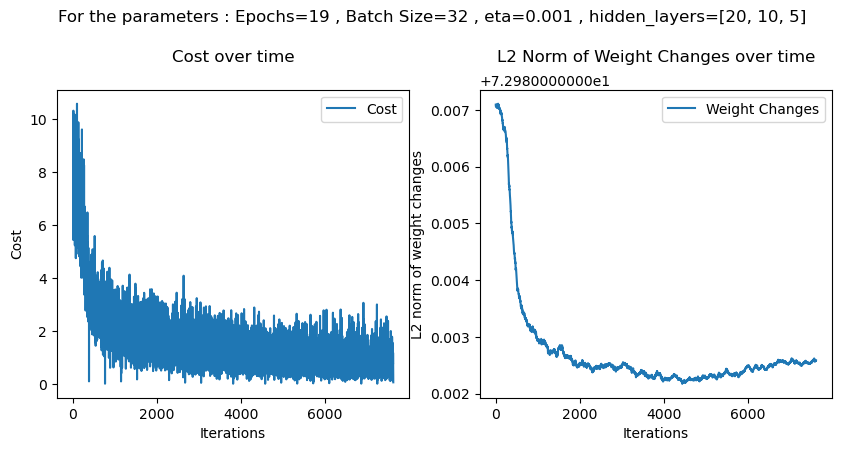

Batch size: 32, Learning rate: 0.001, Hidden Layers: [20, 10, 5], epochs:20 , Accuracy: 0.9474
 
Epoch 1/20, Cost: 0.49923712832205713
Epoch 2/20, Cost: 0.49985145704487205
Epoch 3/20, Cost: 0.502153845357156
Epoch 4/20, Cost: 0.9999847139941114
Epoch 5/20, Cost: 0.4999999967480778
Epoch 6/20, Cost: 0.49659607212553797
Epoch 7/20, Cost: 3.777420525584574e-05
Epoch 8/20, Cost: 0.4990113870159981
Epoch 9/20, Cost: 1.4021734925578226
Epoch 10/20, Cost: 7.993913634495728e-07
Epoch 11/20, Cost: 0.8532552066966701
Epoch 12/20, Cost: 0.9993904382375252
Epoch 13/20, Cost: 0.9927526307580773
Epoch 14/20, Cost: 0.9981596575955617
Epoch 15/20, Cost: 0.9983721525192181
Epoch 16/20, Cost: 0.9985064397369123
Epoch 17/20, Cost: 0.5008500584311273
Epoch 18/20, Cost: 1.4980432456290467
Epoch 19/20, Cost: 0.9421258085426268
Epoch 20/20, Cost: 0.432157991289249


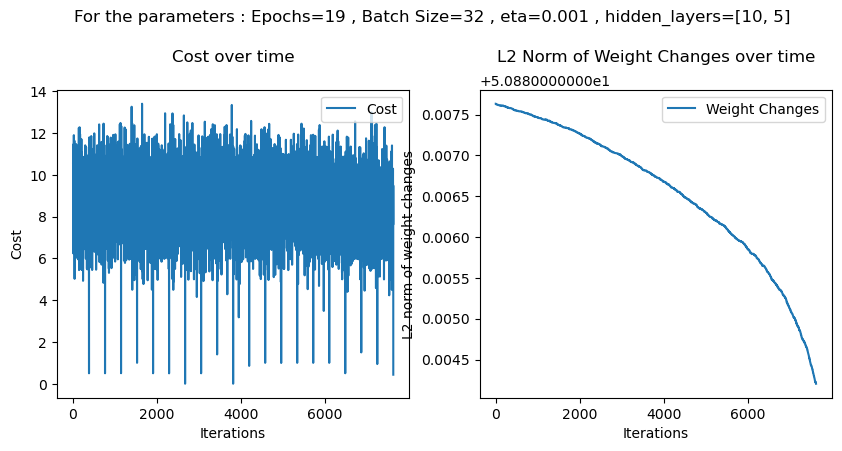

Batch size: 32, Learning rate: 0.001, Hidden Layers: [10, 5], epochs:20 , Accuracy: 0.4450
 
Epoch 1/20, Cost: 1.1065432996477271
Epoch 2/20, Cost: 1.000044884131996
Epoch 3/20, Cost: 0.14985315927625692
Epoch 4/20, Cost: 0.5
Epoch 5/20, Cost: 1.2720412978833944e-17
Epoch 6/20, Cost: 1.0000000000000002
Epoch 7/20, Cost: 0.5000000222352796
Epoch 8/20, Cost: 0.5000000012200643
Epoch 9/20, Cost: 9.062321807230023e-25
Epoch 10/20, Cost: 1.0000014470547534
Epoch 11/20, Cost: 0.4999999943728508
Epoch 12/20, Cost: 0.4999999999889059
Epoch 13/20, Cost: 0.4999999999984597
Epoch 14/20, Cost: 1.4999422407968737
Epoch 15/20, Cost: 0.5000000000000002
Epoch 16/20, Cost: 1.4999999997905291
Epoch 17/20, Cost: 0.49999999814674256
Epoch 18/20, Cost: 0.9999999989172442
Epoch 19/20, Cost: 0.4999999999999999
Epoch 20/20, Cost: 0.4999999999999658


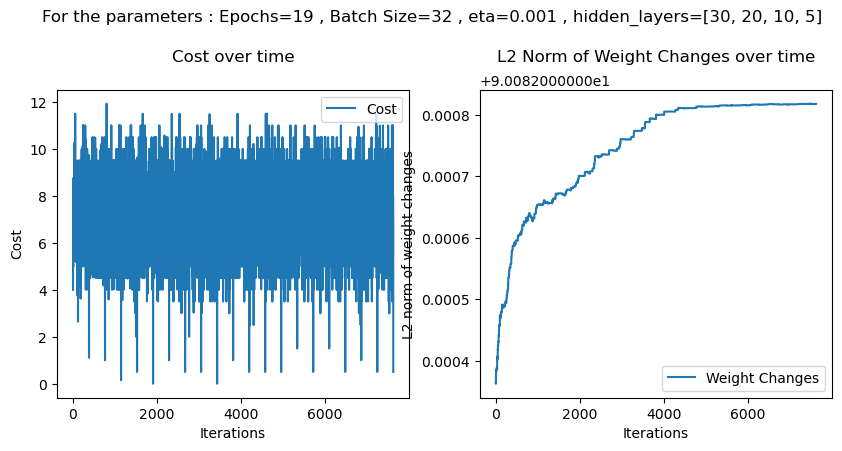

Batch size: 32, Learning rate: 0.001, Hidden Layers: [30, 20, 10, 5], epochs:20 , Accuracy: 0.5546
 
Epoch 1/20, Cost: 0.0004811871299882202
Epoch 2/20, Cost: 0.24991077880380178
Epoch 3/20, Cost: 0.002152528353818868
Epoch 4/20, Cost: 0.018499747465260324
Epoch 5/20, Cost: 6.710043855714162e-05
Epoch 6/20, Cost: 0.0008352681472403755
Epoch 7/20, Cost: 7.128185119161705e-07
Epoch 8/20, Cost: 0.0001039789334697096
Epoch 9/20, Cost: 5.637406933266506e-05
Epoch 10/20, Cost: 0.002259742279357568
Epoch 11/20, Cost: 4.4482196782863435e-14
Epoch 12/20, Cost: 0.00017149079732641266
Epoch 13/20, Cost: 0.0005472670497234566
Epoch 14/20, Cost: 0.004614774480595752
Epoch 15/20, Cost: 7.726102688639046e-08
Epoch 16/20, Cost: 0.00018341770703234983
Epoch 17/20, Cost: 0.0021988915274647196
Epoch 18/20, Cost: 0.0008973534025664865
Epoch 19/20, Cost: 0.4932742147952902
Epoch 20/20, Cost: 1.6420750502886213e-07


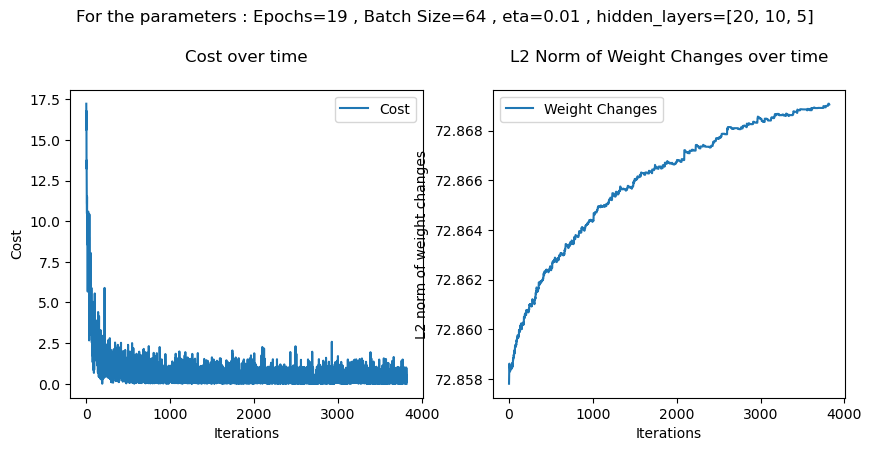

Batch size: 64, Learning rate: 0.01, Hidden Layers: [20, 10, 5], epochs:20 , Accuracy: 0.9876
 
Epoch 1/20, Cost: 0.01575506869825338
Epoch 2/20, Cost: 0.05646072219538217
Epoch 3/20, Cost: 0.07122608080057247
Epoch 4/20, Cost: 0.0022353311751331425
Epoch 5/20, Cost: 0.033150779241263605
Epoch 6/20, Cost: 0.2811238645838525
Epoch 7/20, Cost: 0.029259572875368216
Epoch 8/20, Cost: 0.0002992399670514902
Epoch 9/20, Cost: 0.0627427387764185
Epoch 10/20, Cost: 0.012116191979316857
Epoch 11/20, Cost: 0.04032860455692855
Epoch 12/20, Cost: 0.06260842857575052
Epoch 13/20, Cost: 0.0006668731519237823
Epoch 14/20, Cost: 0.03712107163230575
Epoch 15/20, Cost: 0.02457864538952041
Epoch 16/20, Cost: 0.00044573902400470855
Epoch 17/20, Cost: 0.03807175602011768
Epoch 18/20, Cost: 0.00239442184813111
Epoch 19/20, Cost: 0.000484514532351216
Epoch 20/20, Cost: 0.0017900521282916291


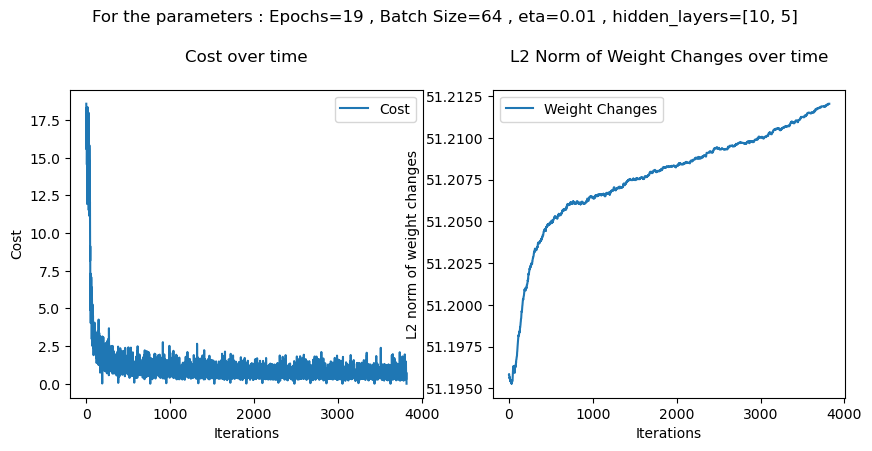

Batch size: 64, Learning rate: 0.01, Hidden Layers: [10, 5], epochs:20 , Accuracy: 0.9873
 
Epoch 1/20, Cost: 3.2636067021776743e-12
Epoch 2/20, Cost: 2.7309963933878832e-09
Epoch 3/20, Cost: 8.547523809329364e-14
Epoch 4/20, Cost: 5.193868424451054e-12
Epoch 5/20, Cost: 3.827248928385066e-17
Epoch 6/20, Cost: 3.2903528867301536e-20
Epoch 7/20, Cost: 0.0
Epoch 8/20, Cost: 1.651553608458149e-25
Epoch 9/20, Cost: 2.9060782065921835e-23
Epoch 10/20, Cost: 2.438465073163528e-28
Epoch 11/20, Cost: 0.0
Epoch 12/20, Cost: 4.58051901760392e-22
Epoch 13/20, Cost: 8.02430005079033e-27
Epoch 14/20, Cost: 0.01433716280080161
Epoch 15/20, Cost: 8.008588236586422e-20
Epoch 16/20, Cost: 1.3019858758642038e-23
Epoch 17/20, Cost: 2.7182704238567033e-21
Epoch 18/20, Cost: 2.495007918878598e-10
Epoch 19/20, Cost: 0.5000000000000002
Epoch 20/20, Cost: 0.5000000002164673


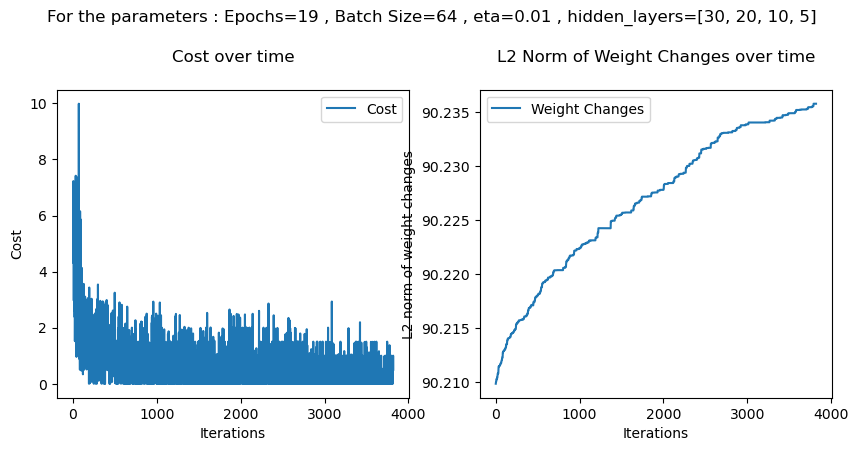

Batch size: 64, Learning rate: 0.01, Hidden Layers: [30, 20, 10, 5], epochs:20 , Accuracy: 0.9888
 
Epoch 1/20, Cost: 0.5032974329331095
Epoch 2/20, Cost: 7.05855879845498e-05
Epoch 3/20, Cost: 0.48253483858944335
Epoch 4/20, Cost: 0.5767789143724914
Epoch 5/20, Cost: 0.0059367900824530235
Epoch 6/20, Cost: 0.3427273953318092
Epoch 7/20, Cost: 0.3050411214476752
Epoch 8/20, Cost: 0.02050300096637865
Epoch 9/20, Cost: 0.028127802377237866
Epoch 10/20, Cost: 0.004281189784126914
Epoch 11/20, Cost: 0.0014061031079654785
Epoch 12/20, Cost: 0.0011866658867515725
Epoch 13/20, Cost: 4.2321671320619974e-05
Epoch 14/20, Cost: 0.0010890480377381837
Epoch 15/20, Cost: 0.0018023331063277469
Epoch 16/20, Cost: 0.0008227357740770373
Epoch 17/20, Cost: 0.006349163175780772
Epoch 18/20, Cost: 0.0025989960439884987
Epoch 19/20, Cost: 2.0436567008381906e-05
Epoch 20/20, Cost: 0.010970966166725068


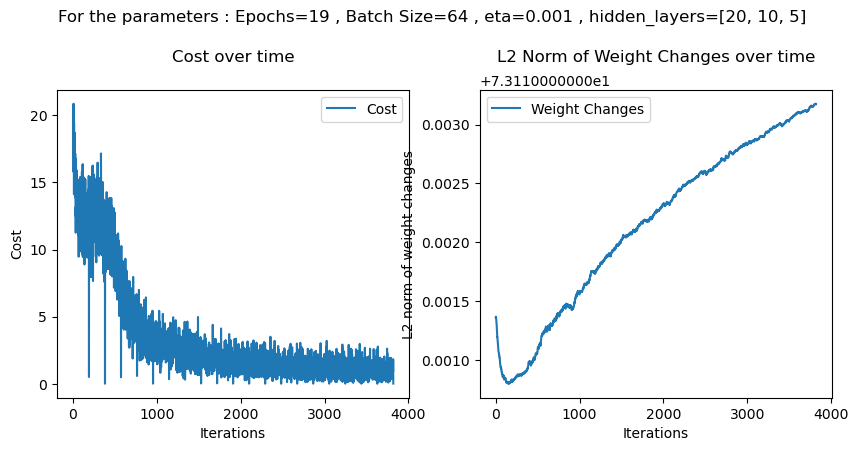

Batch size: 64, Learning rate: 0.001, Hidden Layers: [20, 10, 5], epochs:20 , Accuracy: 0.9605
 
Epoch 1/20, Cost: 0.5007525427638937
Epoch 2/20, Cost: 0.9841371970460351
Epoch 3/20, Cost: 0.49973328703283715
Epoch 4/20, Cost: 0.4960646744223972
Epoch 5/20, Cost: 0.9974896789037843
Epoch 6/20, Cost: 0.5009079658476282
Epoch 7/20, Cost: 0.4973525026602857
Epoch 8/20, Cost: 0.9966910890275495
Epoch 9/20, Cost: 0.5007742703750331
Epoch 10/20, Cost: 0.4960569686817858
Epoch 11/20, Cost: 0.9990775992473825
Epoch 12/20, Cost: 0.946164934119553
Epoch 13/20, Cost: 0.4972504672506427
Epoch 14/20, Cost: 1.4998929478066456
Epoch 15/20, Cost: 1.0000176399676783
Epoch 16/20, Cost: 0.29425806166430435
Epoch 17/20, Cost: 0.9902159580801132
Epoch 18/20, Cost: 0.5023676117180123
Epoch 19/20, Cost: 0.9148333792358178
Epoch 20/20, Cost: 0.3797986006249769


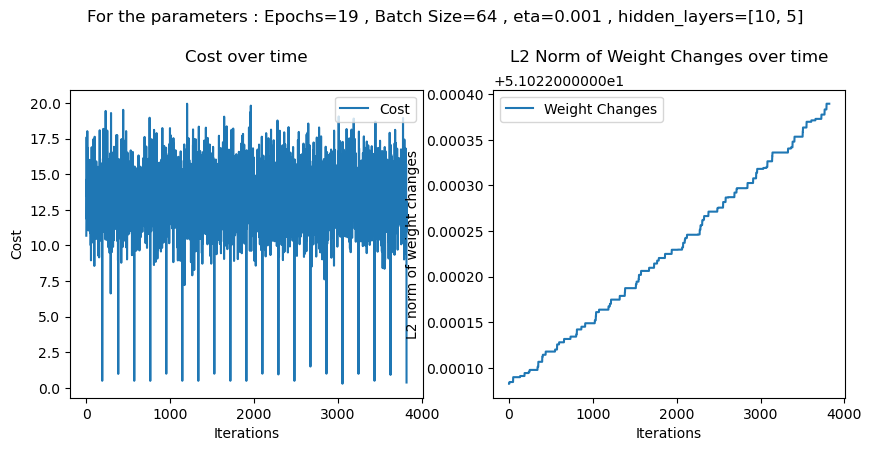

Batch size: 64, Learning rate: 0.001, Hidden Layers: [10, 5], epochs:20 , Accuracy: 0.5547
 
Epoch 1/20, Cost: 0.036527609468948
Epoch 2/20, Cost: 0.3250622536719702
Epoch 3/20, Cost: 0.00939957632001285
Epoch 4/20, Cost: 0.7865585472617346
Epoch 5/20, Cost: 0.000315102972638498
Epoch 6/20, Cost: 0.4966974564515807
Epoch 7/20, Cost: 0.007225389668588614
Epoch 8/20, Cost: 0.019961491957128322
Epoch 9/20, Cost: 0.19229974504101932
Epoch 10/20, Cost: 0.13302455022992532
Epoch 11/20, Cost: 0.021796717562971944
Epoch 12/20, Cost: 0.00303895498311738
Epoch 13/20, Cost: 0.19848571288474331
Epoch 14/20, Cost: 0.3701921721506399
Epoch 15/20, Cost: 0.2332873840805057
Epoch 16/20, Cost: 0.02203257666126404
Epoch 17/20, Cost: 0.09731441820439303
Epoch 18/20, Cost: 0.5152404568380394
Epoch 19/20, Cost: 0.07200690663820221
Epoch 20/20, Cost: 0.016356186501835936


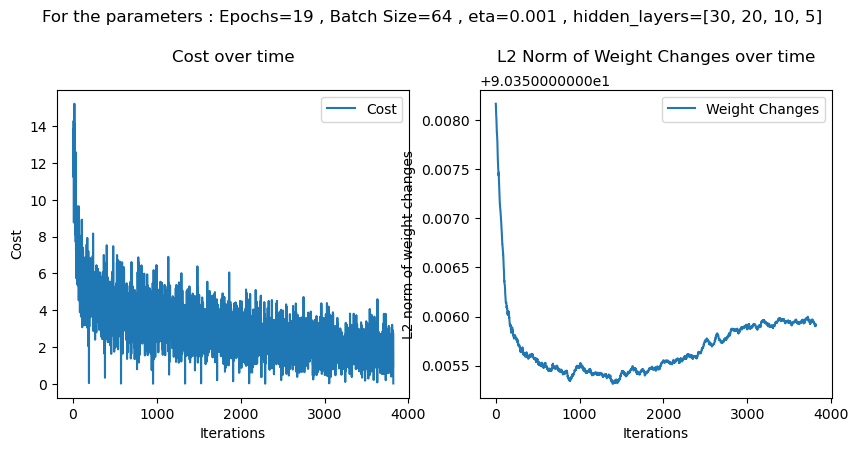

Batch size: 64, Learning rate: 0.001, Hidden Layers: [30, 20, 10, 5], epochs:20 , Accuracy: 0.9385
 
Best Hyperparameters: {'batch_size': 20, 'eta': 0.01, 'hidden_layers': [20, 10, 5], 'epochs': 20}, Best Accuracy: 0.9902


In [28]:
# batch_sizes = [500, 100, 200]
# etas = [0.001, 0.01, 0.1]
# hidden_layers_list = [[500, 100] , [500,250,50] , [1000, 500, 250] ]

batch_sizes = [20,32, 64] #40 good
etas = [ 0.01,0.001]
hidden_layers_list = [[20,10,5] , [10,5] , [30,20,10,5]]   #[600,200,20,5]
epochs =[20]


best_accuracy = 0
best_model = None
best_hyperparams = {}

for batch_size in batch_sizes:
    for eta in etas:
        for hidden_layers in hidden_layers_list:
            for epoch in epochs:
                model = train_NNet(train_X_1_5, train_class_1_5, epochs=epoch, batch_size=batch_size, eta=eta,hidden_layers=hidden_layers)
                accuracy,Y_predict = test_model(test_X_1_5,test_y_1_5,model,1,5)

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_hyperparams = {'batch_size': batch_size, 'eta': eta, 'hidden_layers': hidden_layers,'epochs':epoch}
                    
                print(f"Batch size: {batch_size}, Learning rate: {eta}, Hidden Layers: {hidden_layers}, epochs:{epoch} , Accuracy: {accuracy:.4f}")
                print(" ")
print(f"Best Hyperparameters: {best_hyperparams}, Best Accuracy: {best_accuracy:.4f}")

            

----------------------------------------

Let try another hyperparameters closed to our best parameter.Also lets plot the confusion matrix.

In [37]:
from sklearn.metrics import confusion_matrix
import pandas as pd


def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)



Epoch 1/20, Cost: 0.9999998970714854
Epoch 2/20, Cost: 3.535089104561491e-09
Epoch 3/20, Cost: 0.9999999999995213
Epoch 4/20, Cost: 0.5000004112278291
Epoch 5/20, Cost: 0.5000000000025462
Epoch 6/20, Cost: 0.4999999999994237
Epoch 7/20, Cost: 0.5151636614367672
Epoch 8/20, Cost: 1.0000001562658145
Epoch 9/20, Cost: 0.5000000000072142
Epoch 10/20, Cost: 1.0000000273301888
Epoch 11/20, Cost: 0.5000000002357321
Epoch 12/20, Cost: 0.9999999864120843
Epoch 13/20, Cost: 1.000000000001591
Epoch 14/20, Cost: 0.49999947863518235
Epoch 15/20, Cost: 1.4999682190968573
Epoch 16/20, Cost: 0.5000000003930616
Epoch 17/20, Cost: 0.5243545696263809
Epoch 18/20, Cost: 0.5000068339336178
Epoch 19/20, Cost: 0.9999999999999508
Epoch 20/20, Cost: 0.9999999986693842


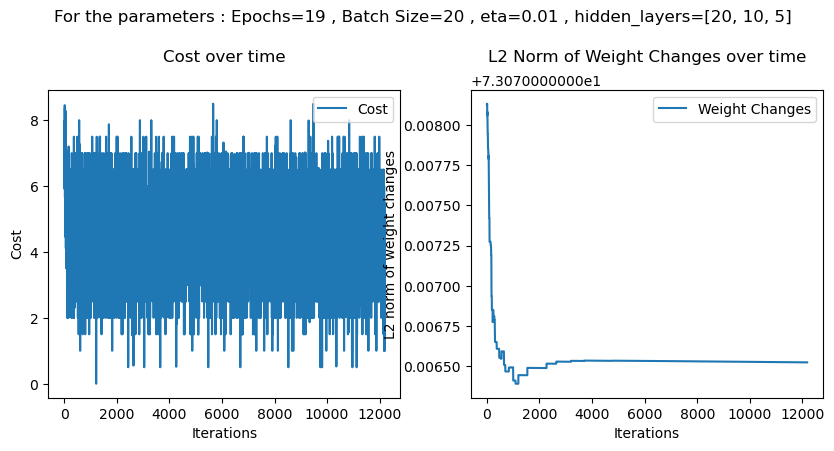

[[6739    3]
 [5406   15]]
Batch size: 20, Learning rate: 0.01, Hidden Layers: [20, 10, 5], epochs:20 , Accuracy: 0.5553
 
Epoch 1/20, Cost: 0.06572686346737266
Epoch 2/20, Cost: 0.14602834302321807
Epoch 3/20, Cost: 0.10602994757828861
Epoch 4/20, Cost: 0.18365478182123504
Epoch 5/20, Cost: 0.10543378277235746
Epoch 6/20, Cost: 0.06183192683365104
Epoch 7/20, Cost: 0.0009259870561167616
Epoch 8/20, Cost: 0.0006453983470552777
Epoch 9/20, Cost: 4.983458664144765e-05
Epoch 10/20, Cost: 6.027550970359029e-06
Epoch 11/20, Cost: 0.0006884113279385981
Epoch 12/20, Cost: 0.00013295636887345952
Epoch 13/20, Cost: 0.0004888652748494084
Epoch 14/20, Cost: 0.0003568199430000813
Epoch 15/20, Cost: 0.0005879616236709945
Epoch 16/20, Cost: 0.004602699506337757
Epoch 17/20, Cost: 0.10888835055629893
Epoch 18/20, Cost: 0.01577122215555507
Epoch 19/20, Cost: 2.914694907882177e-06
Epoch 20/20, Cost: 0.0004616231748051891


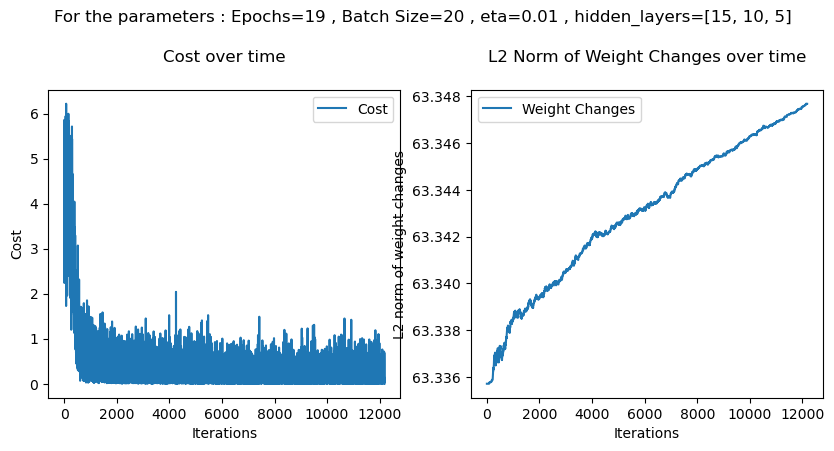

[[6656   86]
 [  48 5373]]
Batch size: 20, Learning rate: 0.01, Hidden Layers: [15, 10, 5], epochs:20 , Accuracy: 0.9890
 
Epoch 1/20, Cost: 3.999713919676301
Epoch 2/20, Cost: 2.499292447358346
Epoch 3/20, Cost: 4.488001874519158
Epoch 4/20, Cost: 2.000165864751124
Epoch 5/20, Cost: 4.018092018255625
Epoch 6/20, Cost: 3.4988422269300825
Epoch 7/20, Cost: 3.977003918131396
Epoch 8/20, Cost: 4.495928994092195
Epoch 9/20, Cost: 3.5000058462552395
Epoch 10/20, Cost: 3.499910799394107
Epoch 11/20, Cost: 1.9990405301246394
Epoch 12/20, Cost: 2.4999469454045395
Epoch 13/20, Cost: 4.000196366008751
Epoch 14/20, Cost: 4.998554842667347
Epoch 15/20, Cost: 3.9882373694254927
Epoch 16/20, Cost: 4.998299454441228
Epoch 17/20, Cost: 1.9998704038463153
Epoch 18/20, Cost: 4.965905882797614
Epoch 19/20, Cost: 4.499994677994083
Epoch 20/20, Cost: 4.997329147169469


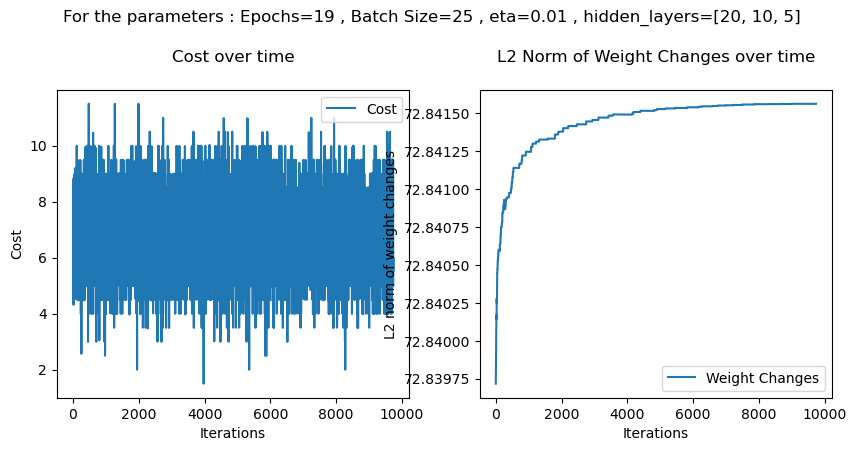

[[   0 6742]
 [   0 5421]]
Batch size: 25, Learning rate: 0.01, Hidden Layers: [20, 10, 5], epochs:20 , Accuracy: 0.4457
 
Epoch 1/20, Cost: 0.2730277045172459
Epoch 2/20, Cost: 0.6553993774136517
Epoch 3/20, Cost: 0.35888156031490204
Epoch 4/20, Cost: 0.5403103765913099
Epoch 5/20, Cost: 0.0020834899859264143
Epoch 6/20, Cost: 0.08615292332660263
Epoch 7/20, Cost: 0.5032403459391709
Epoch 8/20, Cost: 5.690923352330944e-05
Epoch 9/20, Cost: 0.4638604520917744
Epoch 10/20, Cost: 0.224767630267984
Epoch 11/20, Cost: 8.364418334585621e-09
Epoch 12/20, Cost: 2.5203381649067573e-05
Epoch 13/20, Cost: 0.0008187756610456637
Epoch 14/20, Cost: 0.0020462124996362924
Epoch 15/20, Cost: 0.5011111776383849
Epoch 16/20, Cost: 6.289518247002301e-06
Epoch 17/20, Cost: 0.013490073303706314
Epoch 18/20, Cost: 0.0006000048327520282
Epoch 19/20, Cost: 5.874005374861017e-05
Epoch 20/20, Cost: 0.0029287538372649046


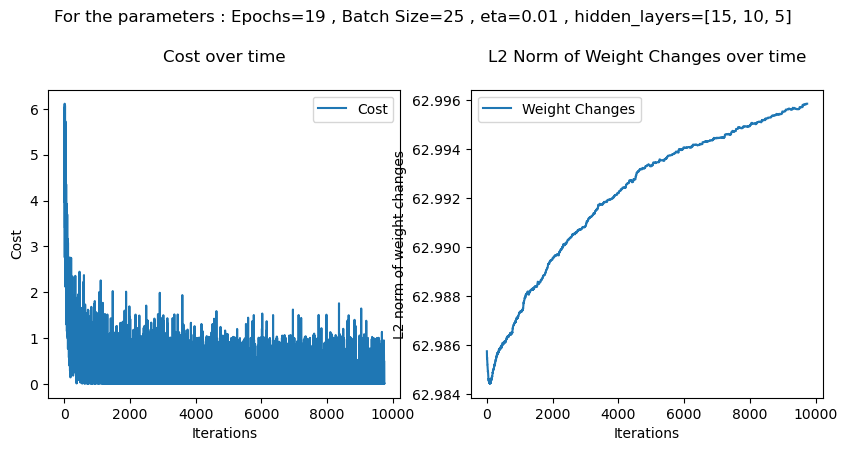

[[6656   86]
 [  86 5335]]
Batch size: 25, Learning rate: 0.01, Hidden Layers: [15, 10, 5], epochs:20 , Accuracy: 0.9859
 
Epoch 1/20, Cost: 0.22351286395500086
Epoch 2/20, Cost: 0.6541074996592768
Epoch 3/20, Cost: 0.9799952561993355
Epoch 4/20, Cost: 0.7102530111348173
Epoch 5/20, Cost: 0.5018638038063796
Epoch 6/20, Cost: 0.1726123871776729
Epoch 7/20, Cost: 0.5723641333132119
Epoch 8/20, Cost: 0.23254539206224376
Epoch 9/20, Cost: 0.256716790680858
Epoch 10/20, Cost: 5.7134329498683725e-06
Epoch 11/20, Cost: 0.00018557717442608173
Epoch 12/20, Cost: 2.132482178030491e-06
Epoch 13/20, Cost: 1.4685506427343804e-05
Epoch 14/20, Cost: 0.0016697949051623505
Epoch 15/20, Cost: 0.003276273120055953
Epoch 16/20, Cost: 0.0002273616193198226
Epoch 17/20, Cost: 0.0024629097326194487
Epoch 18/20, Cost: 0.00024436264294930965
Epoch 19/20, Cost: 0.0007369233132349732
Epoch 20/20, Cost: 0.0001274639182548053


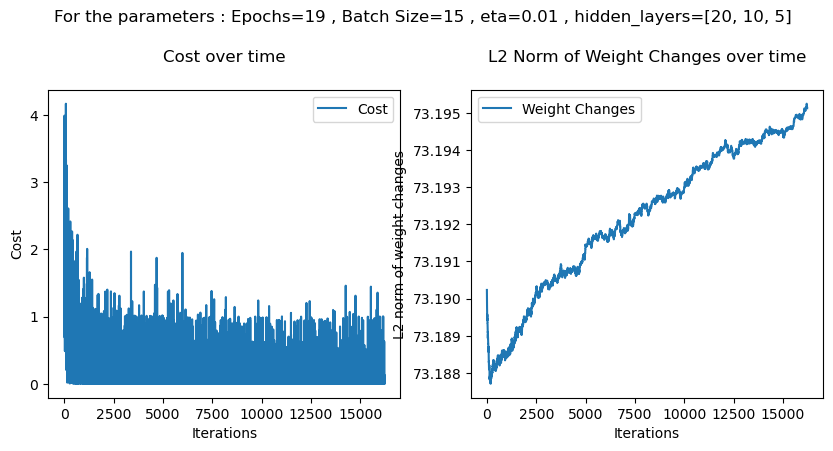

[[6635  107]
 [  67 5354]]
Batch size: 15, Learning rate: 0.01, Hidden Layers: [20, 10, 5], epochs:20 , Accuracy: 0.9857
 
Epoch 1/20, Cost: 2.146727333971852
Epoch 2/20, Cost: 0.5215485331063247
Epoch 3/20, Cost: 0.0011382450507642589
Epoch 4/20, Cost: 0.27705560425030945
Epoch 5/20, Cost: 0.09687701626243672
Epoch 6/20, Cost: 0.557867202494955
Epoch 7/20, Cost: 0.12202194753109145
Epoch 8/20, Cost: 0.034597855350285436
Epoch 9/20, Cost: 0.12630968193935296
Epoch 10/20, Cost: 0.01790991227824419
Epoch 11/20, Cost: 4.642087269896633e-05
Epoch 12/20, Cost: 0.16152800430737893
Epoch 13/20, Cost: 0.13128727038832919
Epoch 14/20, Cost: 1.874128485028203e-05
Epoch 15/20, Cost: 0.2543798561422093
Epoch 16/20, Cost: 0.12653014926807465
Epoch 17/20, Cost: 0.001182173468692409
Epoch 18/20, Cost: 0.7012390654765867
Epoch 19/20, Cost: 0.0037577769040938666
Epoch 20/20, Cost: 0.0017313820619679857


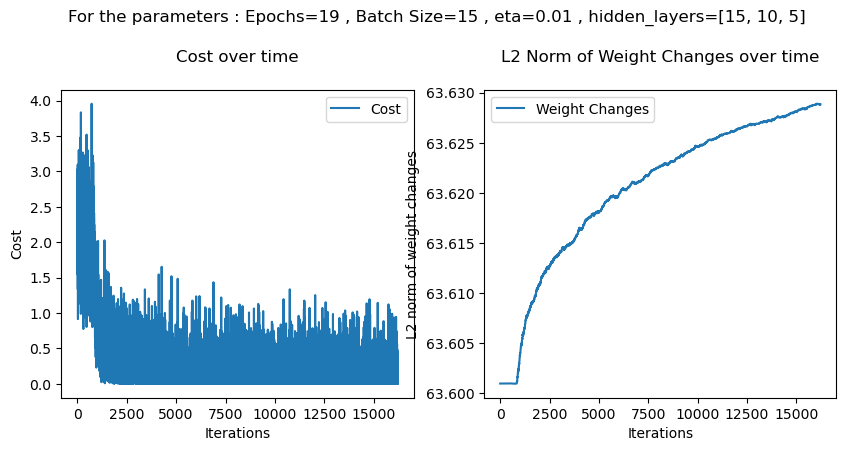

[[6658   84]
 [  69 5352]]
Batch size: 15, Learning rate: 0.01, Hidden Layers: [15, 10, 5], epochs:20 , Accuracy: 0.9874
 
Best Hyperparameters: {'batch_size': 20, 'eta': 0.01, 'hidden_layers': [15, 10, 5], 'epochs': 20}, Best Accuracy: 0.9890


In [44]:
batch_sizes = [20,25,15] #40 good
etas = [ 0.01]
hidden_layers_list = [[20,10,5], [15,10,5]]   #[600,200,20,5]
epochs =[20]


best_accuracy = 0
best_model = None
best_hyperparams = {}
y_actu = pd.Series(test_y_1_5, name='Actual')
for batch_size in batch_sizes:
    for eta in etas:
        for hidden_layers in hidden_layers_list:
            for epoch in epochs:
                model = train_NNet(train_X_1_5, train_class_1_5, epochs=epoch, batch_size=batch_size, eta=eta,hidden_layers=hidden_layers)
                accuracy,Y_predict = test_model(test_X_1_5,test_y_1_5,model,1,5)
                

                c_mat= confusion_matrix(test_y_1_5, Y_predict)
                print(c_mat)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_hyperparams = {'batch_size': batch_size, 'eta': eta, 'hidden_layers': hidden_layers,'epochs':epoch}

                print(f"Batch size: {batch_size}, Learning rate: {eta}, Hidden Layers: {hidden_layers}, epochs:{epoch} , Accuracy: {accuracy:.4f}")
                print(" ")
print(f"Best Hyperparameters: {best_hyperparams}, Best Accuracy: {best_accuracy:.4f}")


In above results,two set of parameters got lower accuracy and when consider thier confusion matrix, model is tried to predict the very large number of values as one catergory.(either 1 or 5). That mean model is bais to either 1 or 5.

Epoch 1/20, Cost: 0.06619465582836409
Epoch 2/20, Cost: 0.03057982904452104
Epoch 3/20, Cost: 0.031847487407193106
Epoch 4/20, Cost: 0.059899132258836085
Epoch 5/20, Cost: 4.070365787934791e-09
Epoch 6/20, Cost: 0.0002845469764332707
Epoch 7/20, Cost: 0.05783478830472202
Epoch 8/20, Cost: 0.05510865415407479
Epoch 9/20, Cost: 0.026227931617365804
Epoch 10/20, Cost: 0.027568047512781153
Epoch 11/20, Cost: 1.796698211532524e-10
Epoch 12/20, Cost: 0.02738980726867081
Epoch 13/20, Cost: 0.05648521874722489
Epoch 14/20, Cost: 0.07836487631807798
Epoch 15/20, Cost: 0.026894137423795084
Epoch 16/20, Cost: 0.024661085601529367
Epoch 17/20, Cost: 0.024769043231505423
Epoch 18/20, Cost: 0.06784248664633341
Epoch 19/20, Cost: 0.02554407301932948
Epoch 20/20, Cost: 2.297957026775286e-06


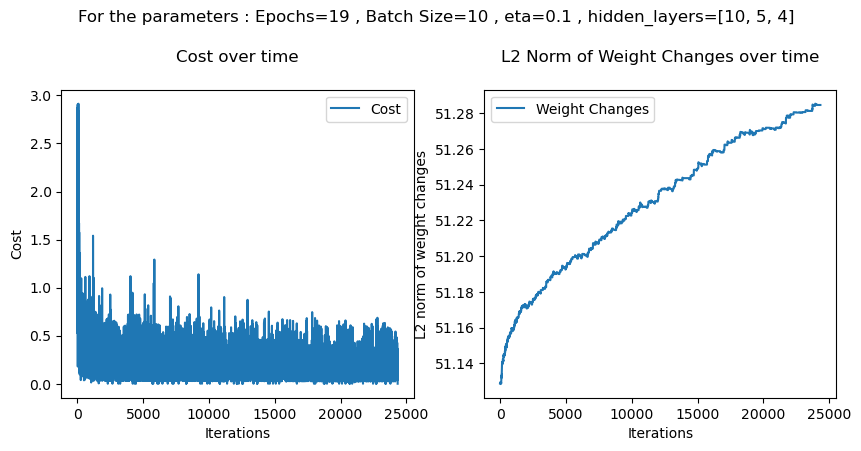

[[6717   25]
 [  11 5410]]
Batch size: 10, Learning rate: 0.1, Hidden Layers: [10, 5, 4], epochs:20 , Accuracy: 0.9970
 
Best Hyperparameters: {'batch_size': 10, 'eta': 0.1, 'hidden_layers': [10, 5, 4], 'epochs': 20}, Best Accuracy: 0.9970


In [49]:
batch_sizes = [10]
etas = [ 0.1]
hidden_layers_list = [[10,5,4]]
epochs =[20]


best_accuracy = 0
best_model = None
best_hyperparams = {}
y_actu = pd.Series(test_y_1_5, name='Actual')
for batch_size in batch_sizes:
    for eta in etas:
        for hidden_layers in hidden_layers_list:
            for epoch ian epochs:
                model = train_NNet(train_X_1_5, train_class_1_5, epochs=epoch, batch_size=batch_size, eta=eta,hidden_layers=hidden_layers)
                accuracy,Y_predict = test_model(test_X_1_5,test_y_1_5,model,1,5)
                

                c_mat= confusion_matrix(test_y_1_5, Y_predict)
                print(c_mat)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_hyperparams = {'batch_size': batch_size, 'eta': eta, 'hidden_layers': hidden_layers,'epochs':epoch}

                print(f"Batch size: {batch_size}, Learning rate: {eta}, Hidden Layers: {hidden_layers}, epochs:{epoch} , Accuracy: {accuracy:.4f}")
                print(" ")
print(f"Best Hyperparameters: {best_hyperparams}, Best Accuracy: {best_accuracy:.4f}")


So the eta=0.1 in lower batch sizes give more accuracy.
This is the best accuracy that get so far. So the best hyperparameters are= batch_size:10, eta: 0.1,hidden_layers:[10, 5, 4],epochs:20

When considering the batch size, low batch size give good accurcy rather than higher batch size. When I tested with
higher batch size(like 1000,500,300) I get accuracy around 40-50. but when I use batch sizes like 30,20,10 I get more accuracy.

When I am using hidden layer like [500,250,50] it not give high accuracy. but when I use batch size like [10,5](each layers has small number of nodes) it gives more accuracy. This is because,when considering number 1 and number 5 , pixels values of thier images have considerable change.Thats mean we dont need a Nnet which considering lot of fetures. So when we made layers which has lot of fetures(lager number of nodes), model is going to overfit. then it will give low accuracy on test data. When the number of hidden layers are smaller(in above 2) small eta is work well but for large number of hidden layers eta=0.001 is not give good accuracy.


When considering the eta, from above result we can see that eta =0.1 give more accuracy rather than 0.001,0.01( for same other parameters. The reason for this could be the cosiderable feture different of number 1 and number 5. The minimum of the cost function can be locate at very lower(minimum) place and therefore model need to higher learning rate to go to that minimum point.


Cost plots shows that, when the model has less hidden layers its achive lower cost in less number of iterations.


So overall, since number 1 and 5 has considerable changes in thier images, layers which have small number of nodes prevent the model from overfitting. Also using small batch size will help to model to escape sharp or bad local minima and saddle points,avoid getting stuck in sharp local minima that might result in poor generalization and prevent overfitting by making the optimization process less deterministic.

-------------

**Now lets consider d1=1 and d2=7**

In [55]:
extract_X_train,train_y_1_7 = extract_digits(train_X, train_y,1,7)
extract_X_test,test_y_1_7  = extract_digits(train_X, train_y,1,7)

#Vectorizing the data
train_X_1_7 = vectorize_images(extract_X_train)
test_X_1_7  = vectorize_images(extract_X_test)

#storing the class label as 0,1
train_class_1_7 = np.where(train_y_1_7 == 1 , 0 , 1)
test_class_1_7 = np.where(test_y_1_7 == 1 , 0 , 1)


Epoch 1/20, Cost: 0.3955679589787783
Epoch 2/20, Cost: 0.059096751464887264
Epoch 3/20, Cost: 0.12235538564563961
Epoch 4/20, Cost: 0.30360634668015474
Epoch 5/20, Cost: 0.22430185813541992
Epoch 6/20, Cost: 0.22820918283406977
Epoch 7/20, Cost: 0.22691913135884353
Epoch 8/20, Cost: 0.2674345521410073
Epoch 9/20, Cost: 0.33235795052604267
Epoch 10/20, Cost: 0.26463814604087205
Epoch 11/20, Cost: 0.31796201557879783
Epoch 12/20, Cost: 0.2547997604960941
Epoch 13/20, Cost: 0.7120619465362704
Epoch 14/20, Cost: 0.19799684653978653
Epoch 15/20, Cost: 0.30388848975908794
Epoch 16/20, Cost: 0.14812556507345678
Epoch 17/20, Cost: 0.20050440618364604
Epoch 18/20, Cost: 0.7519379627340373
Epoch 19/20, Cost: 0.056058134135695256
Epoch 20/20, Cost: 0.26684650690567985


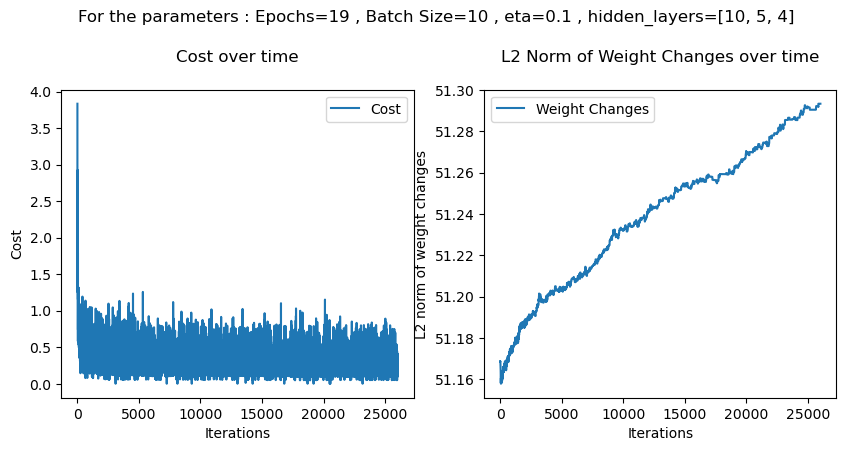

[[6711   31]
 [  33 6232]]
Batch size: 10, Learning rate: 0.1, Hidden Layers: [10, 5, 4], epochs:20 , Accuracy: 0.9951
 
Best Hyperparameters: {'batch_size': 10, 'eta': 0.1, 'hidden_layers': [10, 5, 4], 'epochs': 20}, Best Accuracy: 0.9951


In [57]:
batch_sizes = [10]
etas = [ 0.1]
hidden_layers_list = [[10,5,4]]
epochs =[20]


best_accuracy = 0
best_model = None
best_hyperparams = {}
y_actu = pd.Series(test_y_1_7, name='Actual')
for batch_size in batch_sizes:
    for eta in etas:
        for hidden_layers in hidden_layers_list:
            for epoch in epochs:
                model = train_NNet(train_X_1_7, train_class_1_7, epochs=epoch, batch_size=batch_size, eta=eta,hidden_layers=hidden_layers)
                accuracy,Y_predict = test_model(test_X_1_7,test_y_1_7,model,1,7)
                

                c_mat= confusion_matrix(test_y_1_7, Y_predict)
                print(c_mat)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_hyperparams = {'batch_size': batch_size, 'eta': eta, 'hidden_layers': hidden_layers,'epochs':epoch}

                print(f"Batch size: {batch_size}, Learning rate: {eta}, Hidden Layers: {hidden_layers}, epochs:{epoch} , Accuracy: {accuracy:.4f}")
                print(" ")
print(f"Best Hyperparameters: {best_hyperparams}, Best Accuracy: {best_accuracy:.4f}")


Number 1 and number 7 are more same in images.So we need only to exact different fetures and make model to predict base on that features. Thats why hidden layer which has small nodes works well in these two numbers as well. 